In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,NaN,3.0,2.0,7.0,8.0,2.0,9.0,11.0,7.0,7.0,NaN,8.0,5.0,6.0,NaN
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,NaN,9.0,2.0,9.0,7.0,10.0,NaN
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,NaN,11.0,2.0,8.0,2.0,5.0,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,NaN,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,NaN
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3.0,4.0,10.0,7.0,8.0,12.0,10.0,9.0,2.0,9.0,2.0,6.0,NaN
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,2.0,10.0,12.0,6.0,8.0,NaN,9.0,6.0,8.0,NaN
19997,4.0,8.0,4.0,6.0,4.0,7.0,8.0,NaN,4.0,10.0,7.0,6.0,3.0,9.0,3.0,7.0,NaN
19998,4.0,11.0,4.0,8.0,3.0,0.0,2.0,4.0,6.0,NaN,0.0,7.0,0.0,8.0,NaN,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1500
float64		column 2	2250
float64		column 3	1250
float64		column 4	2250
float64		column 5	1500
float64		column 6	3250
float64		column 7	1750
float64		column 8	3000
float64		column 9	1500
float64		column 10	1000
float64		column 11	1250
float64		column 12	2500
float64		column 13	2000
float64		column 14	2250
float64		column 15	2250
float64		column 16	2500
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,18500.000000,17750.000000,18750.000000,17750.000000,18500.000000,16750.000000,18250.000000,17000.000000,18500.000000,19000.000000,18750.000000,17500.000000,18000.000000,17750.000000,17750.000000,17500.000000,0.0
mean,4.020973,7.059775,5.124107,5.393690,3.489297,6.911403,7.490301,4.581882,5.176054,8.269737,6.452960,7.940457,3.028222,8.329746,3.672732,7.810514,NaN
std,1.872956,3.190194,1.974560,2.185015,2.138116,1.901800,2.247627,2.539482,2.315692,2.454991,2.580446,1.987474,2.267461,1.474767,2.474228,1.535188,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,7.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,8.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

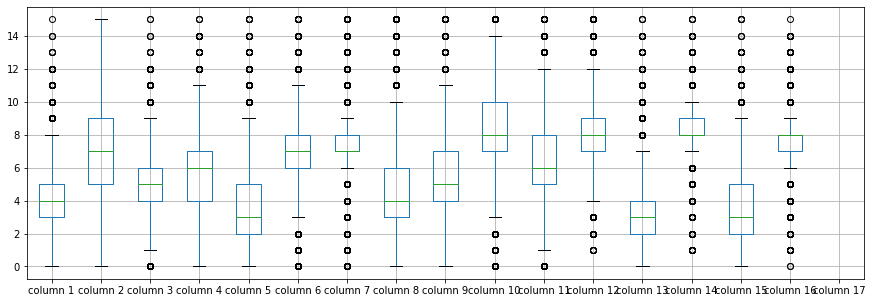

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.020973
column 2     7.059775
column 3     5.124107
column 4     5.393690
column 5     3.489297
column 6     6.911403
column 7     7.490301
column 8     4.581882
column 9     5.176054
column 10    8.269737
column 11    6.452960
column 12    7.940457
column 13    3.028222
column 14    8.329746
column 15    3.672732
column 16    7.810514
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.738164,0.843607,0.649957,0.604537,-0.031397,0.044434,0.018644,0.046848,0.147400,0.034479,-0.047484,0.474461,0.100420,0.259662,-0.095025,NaN
column 2,0.738164,1.000000,0.650203,0.805096,0.534843,0.034840,-0.031488,-0.017576,0.089963,0.149656,-0.047426,-0.013015,0.265014,0.014159,0.216559,-0.042488,NaN
column 3,0.843607,0.650203,1.000000,0.633642,0.754292,0.057318,0.020786,-0.087113,0.052872,0.114551,0.005807,-0.048685,0.544438,0.049213,0.241887,-0.112026,NaN
column 4,0.649957,0.805096,0.633642,1.000000,0.621990,0.036620,-0.024091,0.080474,0.059859,0.007298,-0.016977,0.025698,0.243910,0.027545,0.281492,-0.015922,NaN
column 5,0.604537,0.534843,0.754292,0.621990,1.000000,0.127159,-0.028552,-0.000447,-0.060557,-0.062963,-0.069172,-0.041539,0.603027,0.024122,0.466516,-0.064184,NaN
column 6,-0.031397,0.034840,0.057318,0.036620,0.127159,1.000000,-0.340934,-0.048562,-0.114374,0.076757,-0.328502,-0.038885,0.128871,-0.237519,0.116903,0.227067,NaN
column 7,0.044434,-0.031488,0.020786,-0.024091,-0.028552,-0.340934,1.000000,-0.109462,-0.050487,0.171212,0.590607,-0.247190,-0.028911,0.528540,-0.082798,-0.194566,NaN
column 8,0.018644,-0.017576,-0.087113,0.080474,-0.000447,-0.048562,-0.109462,1.000000,-0.166651,-0.303531,0.026031,0.085557,0.124996,-0.077607,0.029174,0.169667,NaN
column 9,0.046848,0.089963,0.052872,0.059859,-0.060557,-0.114374,-0.050487,-0.166651,1.000000,0.135280,-0.059244,0.100530,-0.364752,-0.049729,0.255266,-0.053407,NaN
column 10,0.147400,0.149656,0.114551,0.007298,-0.062963,0.076757,0.171212,-0.303531,0.135280,1.000000,0.054642,-0.099938,-0.164401,0.034847,-0.084625,-0.104465,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+12,17+12+12,17+12+12+12,17+12+12,17+12,17], vae_layer = False, seed = 120)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 66.66128667602538
Epoch: 1 , loss: 45.02787340698242
Epoch: 2 , loss: 40.9655140625
Epoch: 3 , loss: 39.275136030578615
Epoch: 4 , loss: 38.37131759185791
Epoch: 5 , loss: 37.9038812713623
Epoch: 6 , loss: 37.57990466461182
Epoch: 7 , loss: 37.16640433502197
Epoch: 8 , loss: 37.1962372253418
Epoch: 9 , loss: 37.07089185333252
Epoch: 10 , loss: 36.86663871765137
Epoch: 11 , loss: 36.68422838134766
Epoch: 12 , loss: 36.65487239837646
Epoch: 13 , loss: 36.58104287719726
Epoch: 14 , loss: 36.41914266967773
Epoch: 15 , loss: 36.46772640380859
Epoch: 16 , loss: 36.31267161712646
Epoch: 17 , loss: 36.27299496307373
Epoch: 18 , loss: 36.20971214752197
Epoch: 19 , loss: 36.23638811187744
Epoch: 20 , loss: 36.07644920959473
Epoch: 21 , loss: 36.134265036010746
Epoch: 22 , loss: 36.07481646270752
Epoch: 23 , loss: 36.01629430999756
Epoch: 24 , loss: 36.03189145355225
Epoch: 25 , loss: 35.847057809448245
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     5.242453
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     5.623224
column 8     5.000000
column 9     5.000000
column 10    6.191720
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17    0.002125
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.0,0.0,1.05824,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.938793,0.0,0.000000,0.0,NaN
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,-0.557473,0.0,0.000000,0.0,0.000000,0.0,NaN
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,-4.880808,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,NaN
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,-8.645530,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,NaN
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,NaN
19996,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.211964,0.0,0.000000,0.0,NaN
19997,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,-1.069331,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,NaN
19998,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.000000,9.276427,0.000000,0.0,0.000000,0.0,4.416741,0.0,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

556.5160569151105

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.14904751478862535

In [19]:
new_df.iloc[66,:]

column 1      2.436246
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     2.181756
column 16     7.000000
column 17    -0.000395
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,5.05824,3.0,2.0,7.0,8.00000,2.000000,9.000000,11.000000,7.000000,7.0,2.938793,8.0,5.000000,6.0,-0.002214
1,4.0,7.0,5.00000,5.0,5.0,5.0,9.00000,6.000000,4.000000,8.000000,6.442527,9.0,2.000000,9.0,7.000000,10.0,-0.003558
2,7.0,10.0,8.00000,7.0,4.0,8.0,8.00000,5.000000,5.119192,11.000000,2.000000,8.0,2.000000,5.0,5.000000,10.0,0.002769
3,4.0,9.0,5.00000,7.0,4.0,7.0,7.00000,4.354470,1.000000,7.000000,6.000000,8.0,3.000000,8.0,0.000000,8.0,-0.001878
4,6.0,7.0,8.00000,5.0,4.0,7.0,6.00000,3.000000,7.000000,10.000000,7.000000,9.0,3.000000,8.0,3.000000,7.0,-0.003670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.00000,8.0,3.0,4.0,10.00000,7.000000,8.000000,12.000000,10.000000,9.0,2.000000,9.0,2.000000,6.0,-0.007258
19996,4.0,7.0,6.00000,5.0,3.0,7.0,8.00000,2.000000,10.000000,12.000000,6.000000,8.0,2.211964,9.0,6.000000,8.0,-0.003396
19997,4.0,8.0,4.00000,6.0,4.0,7.0,8.00000,5.930669,4.000000,10.000000,7.000000,6.0,3.000000,9.0,3.000000,7.0,-0.003061
19998,4.0,11.0,4.00000,8.0,3.0,0.0,2.00000,4.000000,6.000000,10.276427,0.000000,7.0,0.000000,8.0,4.416741,8.0,0.001739


In [21]:
imputations[-1].to_excel("Letter_NW_10(imp).xlsx", index=False, header=False)